In [1]:
import imageio as io
from matplotlib import pyplot as plt
import numpy as np

from skimage import exposure
import scipy.ndimage as ndi
from skimage import filters
from skimage import morphology
import math
import pandas as pd

dtype: float64
shape: (256, 256)
values min: 0.0
values max: 680.0


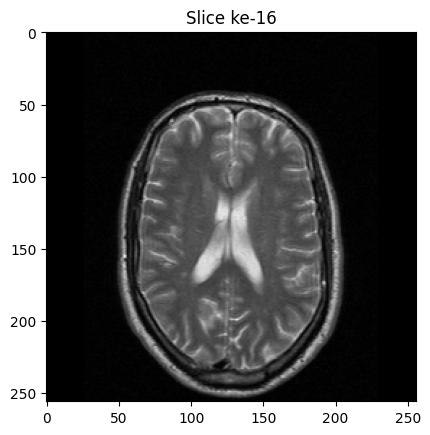

In [3]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load NIfTI file
nifti = nib.load('201_t2w_tse.nii.gz')
image_array = nifti.get_fdata()

# Pilih slice ke-16 (indeks ke-15)
slice_index = 15

# Ambil slice dan perbaiki orientasi (misalnya rotasi 90 derajat)
selected_slice = image_array[:, :, slice_index]
corrected_slice = np.rot90(selected_slice)
image_mri = corrected_slice

# Tampilkan
print('dtype:', image_mri.dtype)
print('shape:', image_mri.shape)
print('values min:', image_mri.min())
print('values max:', image_mri.max())
plt.imshow(image_mri, cmap='gray')
plt.title(f"Slice ke-{slice_index + 1}")
plt.show()

shape: (256, 256)


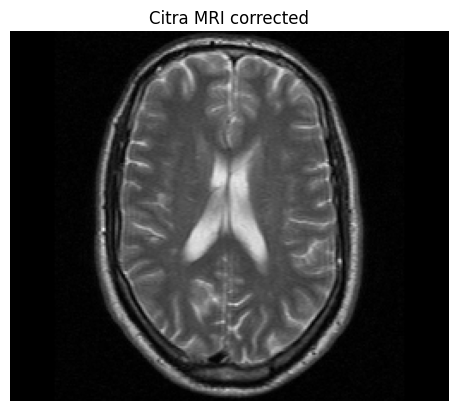

In [4]:
immri = image_mri[40:, :]  
print('shape:', image_mri.shape)
plt.imshow(immri, cmap='gray')
plt.title("Citra MRI corrected")
plt.axis('off')
plt.show()

[AHE]  MSE: 736.206760, PSNR: 27.98 dB


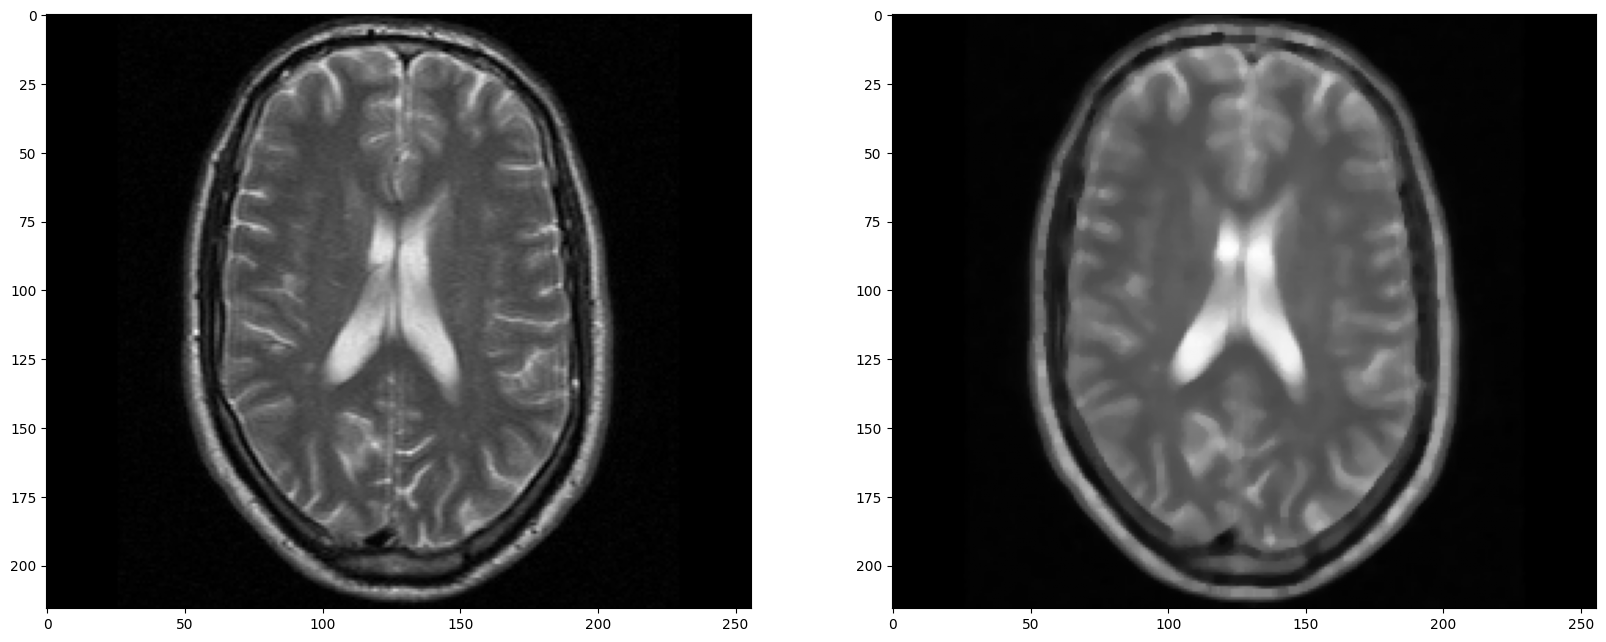

In [13]:
import numpy as np
import scipy.ndimage as ndi

median = ndi.median_filter(immri, size=5)
# Hitung MSE dan PSNR antara gambar asli dan gambar hasil median filter
mse_median = mean_squared_error(immri, median)
psnr_median = peak_signal_noise_ratio(immri, median, data_range=immri.max() - immri.min())
print(f"[AHE]  MSE: {mse_median:.6f}, PSNR: {psnr_median:.2f} dB")

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(immri, cmap='gray')
axes[1].imshow(median, cmap='gray')
plt.show()

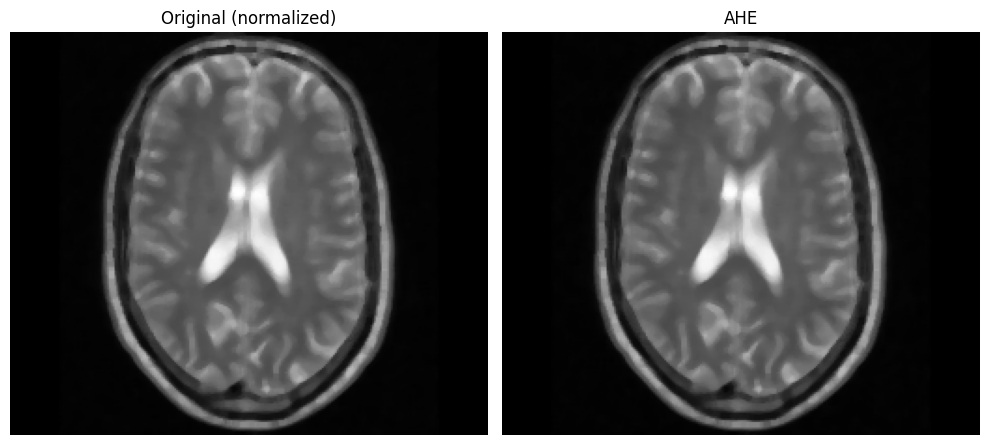

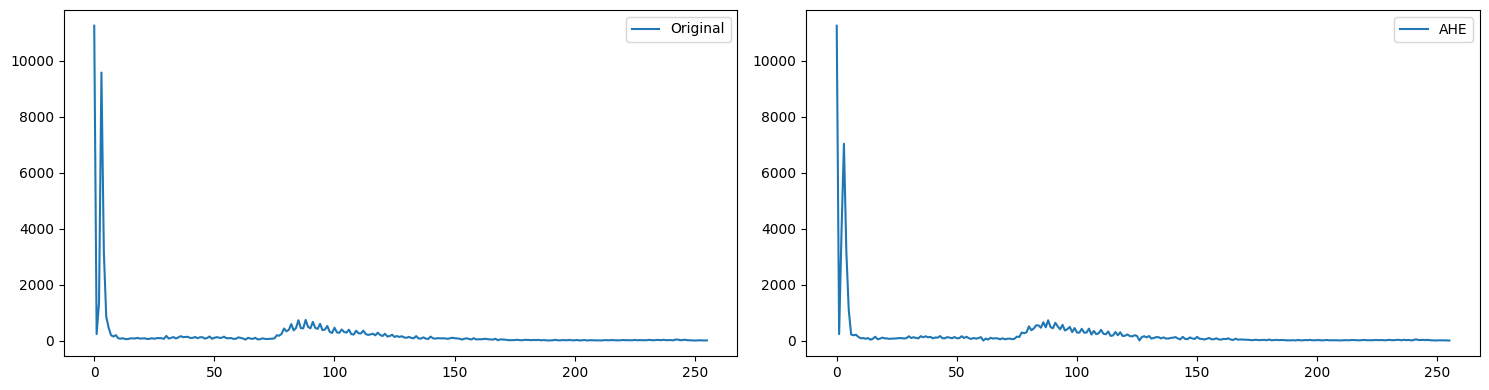

[AHE]  MSE: 0.000004, PSNR: 54.02 dB


In [14]:
# Adaptive Histogram Equalization
from skimage import exposure
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np

# Normalisasi ke 0–1 (wajib untuk input float ke skimage)
immri_norm1 = (median - np.min(median)) / (np.max(median) - np.min(median))

# AHE dan CLAHE
img_AHE = exposure.equalize_adapthist(immri_norm1, clip_limit=0.003)

# Tampilkan citra
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(immri_norm1, cmap='gray')
axes[0].set_title("Original (normalized)")
axes[1].imshow(img_AHE, cmap='gray')
axes[1].set_title("AHE")
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Histogram
hist = np.histogram(immri_norm1, bins=256, range=(0, 1))[0]
hist_AHE = np.histogram(img_AHE, bins=256, range=(0, 1))[0]

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes[0].plot(hist, label='Original')
axes[1].plot(hist_AHE, label='AHE')
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()

# ==== Tambahan: MSE dan PSNR ====
mse_ahe = mean_squared_error(immri_norm1, img_AHE)
psnr_ahe = peak_signal_noise_ratio(immri_norm1, img_AHE, data_range=1.0)

print(f"[AHE]  MSE: {mse_ahe:.6f}, PSNR: {psnr_ahe:.2f} dB")

In [15]:
from skimage import filters

img_try = img_AHE
threshold = filters.threshold_otsu(img_try) #deteksi otomatis nilai threshold yg pas
threshold #threshold yang dihasilkan mampu memisahkan antara foreground dan background

0.224609375

Text(0.5, 1.0, 'thresholded')

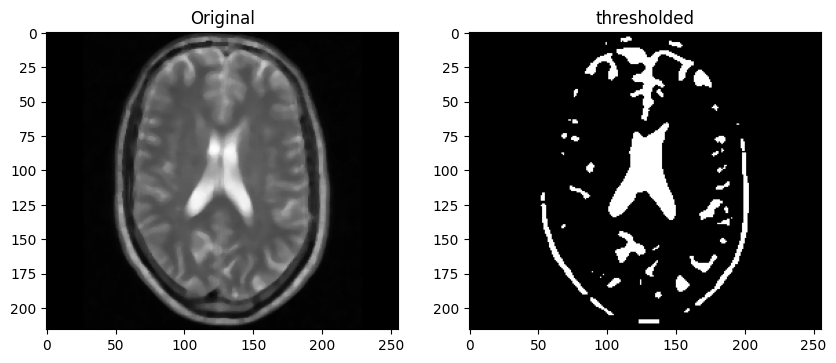

In [16]:
# Contoh thresholding (misalnya threshold = 0.5)
binary_image = (img_try >= 0.5)
# Tampilkan citra
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_try, cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title("thresholded")

In [17]:
from skimage import morphology, measure
import pandas as pd

# Label setiap objek
label_image = measure.label(binary_image)

# Hitung properti tiap komponen
regions = measure.regionprops(label_image)

# Ambil semua area objek
areas = [region.area for region in regions]

# Buat DataFrame
df = pd.DataFrame({
    'Objek ke-': list(range(1, len(areas)+1)),
    'Area': areas
})

# Tandai objek dengan area terbesar
max_area = df['Area'].max()
df['Keterangan'] = df['Area'].apply(lambda x: 'TERBESAR' if x == max_area else '')

# Tampilkan tabel
print(df.to_string(index=False))


 Objek ke-   Area Keterangan
         1   23.0           
         2   30.0           
         3    2.0           
         4  756.0           
         5  183.0           
         6  114.0           
         7   13.0           
         8   18.0           
         9   12.0           
        10    2.0           
        11   11.0           
        12 1642.0   TERBESAR
        13    2.0           
        14   13.0           
        15   18.0           
        16   31.0           
        17   23.0           
        18    4.0           
        19   11.0           
        20    3.0           
        21  429.0           
        22   30.0           
        23   15.0           
        24   28.0           
        25   48.0           
        26   16.0           
        27  111.0           
        28  273.0           
        29   11.0           
        30    1.0           
        31   24.0           
        32    7.0           
        33  221.0           
        34   1

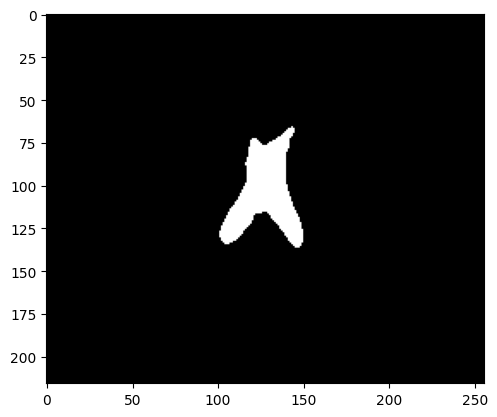

In [18]:
from skimage import morphology

#Remove small objects
corpus = morphology.remove_small_objects(binary_image, min_size=1642)
plt.imshow(corpus, cmap='gray')

c:\Users\WINDOWS 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\skimage\exposure\exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


0.001953125

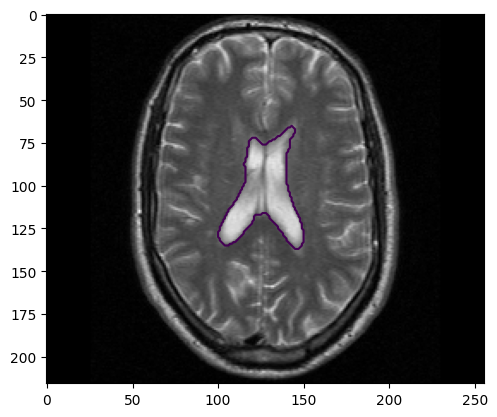

In [19]:
threshold2 = filters.threshold_otsu(corpus)
plt.imshow(immri[:300, :300], cmap='gray')
plt.contour(corpus[:300, :300], [threshold2])
threshold2

In [21]:
mask_corpus = (corpus >= 0.5) * 1

mask_corpus

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

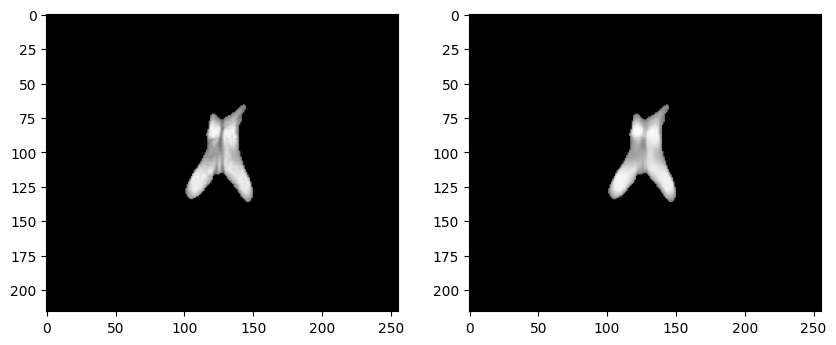

In [22]:
img_overlay1 = np.where(mask_corpus, immri, 0)
img_overlay2 = np.where(mask_corpus, img_AHE, 0)
fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].imshow(img_overlay1, cmap='gray')
axes[1].imshow(img_overlay2, cmap='gray')
plt.show()

In [23]:
labels, nlabels = ndi.label(corpus)

label_arrays = []
#for label_num in range(1, nlabels+1):  
    
  #  label_mask = np.where(labels == label_num, 1, 0)
 #   label_arrays.append(image_segmented)

print('There are {} separate components / objects detected.'.format(nlabels))

There are 1 separate components / objects detected.


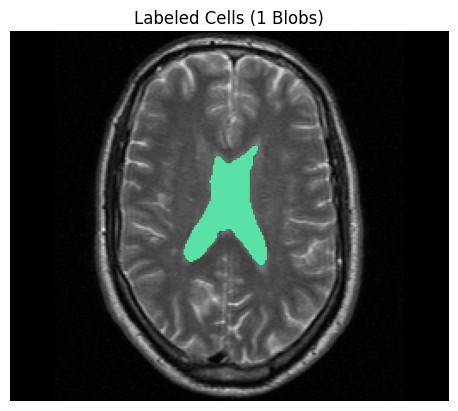

In [24]:
# Create a random colormap
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))

labels_for_display = np.where(labels > 0, labels, np.nan)
plt.imshow(immri, cmap='gray')
plt.imshow(labels_for_display, cmap=rand_cmap)
plt.axis('off')
plt.title('Labeled Cells ({} Blobs)'.format(nlabels))
plt.show()


In [25]:
import math
import pandas as pd
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

image = corpus

label_img = label(image)
regions = regionprops(label_img)
label_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

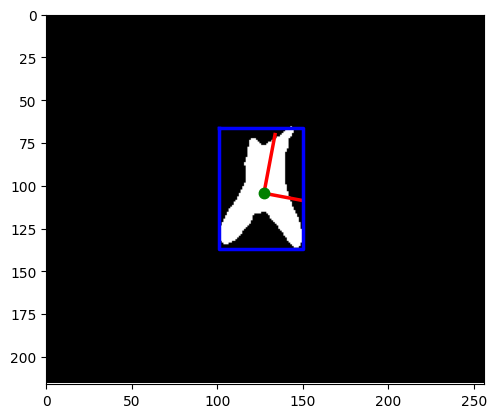

In [26]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

# Sesuaikan axis berdasarkan ukuran gambar
ax.set_xlim(0, image.shape[1])
ax.set_ylim(image.shape[0], 0)  # Inversi axis y agar sesuai orientasi gambar

plt.show()

In [ ]:
from skimage.measure import regionprops_table
import pandas as pd

props = regionprops_table(
    label_img,
    intensity_image=immri,  # <--- ini penting!
    properties=(
        'label',
        'area',
        'bbox_area',
        'centroid',
        'eccentricity',
        'equivalent_diameter',
        'orientation',
        'major_axis_length',
        'minor_axis_length',
        'perimeter',
        'solidity',
        'mean_intensity',
        'max_intensity',
        'min_intensity',
        'weighted_centroid',
        'weighted_moments_hu'
    )
)

df_full = pd.DataFrame(props)
df_full


,label,area,bbox_area,centroid-0,centroid-1,eccentricity,equivalent_diameter,orientation,major_axis_length,minor_axis_length,...,min_intensity,weighted_centroid-0,weighted_centroid-1,weighted_moments_hu-0,weighted_moments_hu-1,weighted_moments_hu-2,weighted_moments_hu-3,weighted_moments_hu-4,weighted_moments_hu-5,weighted_moments_hu-6
0,1,1642.0,3479.0,104.342266,127.309988,0.762092,45.723728,-0.186604,69.784708,45.183379,...,247.0,105.037064,127.191909,0.000557,4.590633e-08,8.035876e-11,8.755923e-14,-1.937007e-25,1.848519e-17,-1.281544e-25


In [28]:
df_full.to_excel(r'D:/YA ALLAH SEMESTER 6/04 - PCM/VS CODE/FP MASKING BRAIN/export_dataframe_corpus.xlsx',
            sheet_name='Sheet_name_1')  